# Extracting big data

## Check ins data

In [1]:
import pandas as pd 
from tqdm import tqdm

PATH = 'raw_Checkins_anonymized.txt'
chunksize = 1000000 
traintypes = {
'user':'str',
'ven':'str',
'time':'str',
'offset':'float'}

cols = list(traintypes.keys())

df_list = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(PATH, names=cols, dtype=traintypes, chunksize=chunksize, sep='\t')):
    # Can process each chunk of dataframe here
    # clean_data(), feature_engineer(),fit()

    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk) 

# Merge all dataframes into one dataframe
X = pd.concat(df_list)

# Delete the dataframe list to release memory
del df_list
del df_chunk

91it [02:26,  1.61s/it]


In [2]:
X.head()

,user,ven,time,offset
0,546830,4f5e3a72e4b053fd6a4313f6,Tue Apr 03 18:00:06 +0000 2012,240.0
1,822121,4b4b87b5f964a5204a9f26e3,Tue Apr 03 18:00:07 +0000 2012,180.0
2,2277773,4a85b1b3f964a520eefe1fe3,Tue Apr 03 18:00:08 +0000 2012,-240.0
3,208842,4b4606f2f964a520751426e3,Tue Apr 03 18:00:08 +0000 2012,-300.0
4,1139878,4d9254ef62ad5481fa6e6a4b,Tue Apr 03 18:00:08 +0000 2012,-180.0


## Venues data

In [3]:
import pandas as pd 
from tqdm import tqdm

PATH = 'raw_POIs.txt'
chunksize = 500000 
traintypes = {
'ven':'str',
'lat':'float',
'lon':'float',
'cat':'str',
'country':'str'}

cols = list(traintypes.keys())

df_list = [] # list to hold the batch dataframe

for df_chunk in tqdm(pd.read_csv(PATH, names=cols, dtype=traintypes, chunksize=chunksize, sep='\t')):
    # Can process each chunk of dataframe here
    # clean_data(), feature_engineer(),fit()

    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk) 

# Merge all dataframes into one dataframe
Y = pd.concat(df_list)

# Delete the dataframe list to release memory
del df_list
del df_chunk

23it [00:17,  1.64it/s]


In [4]:
Y.head()

,ven,lat,lon,cat,country
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US
3,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US
4,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US


# Data observation

## Observing global venues data

In [5]:
Y_UA = Y[Y.country=='UA']

In [12]:
Y_UA.to_csv('venues_in_Ukraine.csv', index=False)

In [6]:
Y_kiev = Y_UA[Y_UA.lat>50.31][Y_UA.lat<50.57][Y_UA.lon>30.24][Y_UA.lon<30.81]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
Y_kiev.to_csv('venues_in_Kyiv.csv', index=False)

In [1]:
import pandas as pd
Y_kiev = pd.read_csv('venues_in_Kyiv.csv')

## Observing global check ins data

In [7]:
a = Y_kiev.ven.unique()

In [8]:
X_kiev = X[X.ven.isin(a)]

In [9]:
len(X_kiev)

217805

## Observing OSMNx and Easyway API

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import requests

latt = 50.439546
lng = 30.517015

r = requests.get('https://api.easyway.info/?login=trokhymovych.mykola&password=mw6GWvwhc29Kwmz&city=kyiv&function=stops.GetStopsNearPointWithRoutes&lat='+str(latt)+'&lng='+str(lng)+'&r=300')
data = r.json()

lat = []
lon = []
for i in data['stop']:
    lat.append(i['lat'])
    lon.append(i['lng'])

mapbox_access_token = "pk.eyJ1IjoidmFsZW50eW4xOTk3IiwiYSI6ImNqNHlubm03cjFpc3EzM21nbW1rdGhvNmwifQ.xuQ0fbWNXjOi3y03MYbqAQ"

data = [
    go.Scattermapbox(
        lat=lat,
        lon=lon,
        mode='markers',
        name = 'Public transport stops',
        marker=go.scattermapbox.Marker(
            size=9
        ),
    ),
    go.Scattermapbox(
        lat=[latt],
        lon=[lng],
        mode='markers',
        name = 'Cafe',
        marker=go.scattermapbox.Marker(
            size=13
        ),
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=latt,
            lon=lng
        ),
        pitch=0,
        zoom=14.5
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



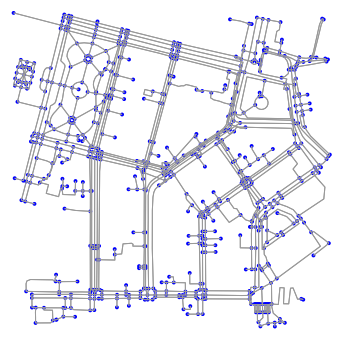

In [19]:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__
# create a network around some (lat, lon) point and plot it
location_point = (latt, lng)
G = ox.graph_from_point(location_point, distance=500, simplify=True, network_type='walk')
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=1)

# Extracting transitions data from check ins data

In [ ]:
X_kiev.time = pd.to_datetime(X_kiev.time)

In [ ]:
# from tqdm import tqdm_notebook as tqdm

# data3 = X_kiev

# users = data3.user.unique()
# transitions = pd.DataFrame(columns = ['A_id', 'B_id', 'A_datetime', 'B_datetime'])
# for i in tqdm(range(len(users))):
#     user_1 = data3[data3.user==users[i]]
#     user_1 = user_1.drop_duplicates(keep='first')
#     for i in range(len(user_1.time)-1):
#         if list(user_1.time)[i+1] - list(user_1.time)[i]<pd.Timedelta('3 hours'):
#             t = pd.DataFrame({'A_id':list(user_1[user_1.time==list(user_1.time)[i]].ven)[:1],
#                               'B_id':list(user_1[user_1.time==list(user_1.time)[i+1]].ven)[:1],
#                               'A_datetime':list(user_1.time)[i],
#                               'B_datetime':list(user_1.time)[i+1]})
#             transitions = pd.concat([transitions,t], axis=0)
# transitions     

In [ ]:
# transitions.to_csv('transitions_all.csv', index= False)

In [25]:
transitions = pd.read_csv('transitions_all.csv')

In [28]:
transitions = transitions.merge(Y_kiev, left_on='A_id', right_on='ven').merge(Y_kiev, left_on='B_id', right_on='ven')[['A_id', 'B_id', 'A_datetime', 'B_datetime', 'lat_x', 'lon_x', 'lat_y', 'lon_y']]

In [30]:
transitions.to_csv('transitions_all_Kyiv.csv', index= False)

In [36]:
Y_kiev.head()
coffee_id = list(Y_kiev[Y_kiev.cat=='Coffee Shop'].ven.unique())

In [39]:
from geopy import distance
A = list(transitions.A_id)
B = list(transitions.B_id)
dist = []
for a,b in tqdm(zip(A,B)):
    coord_a = (list(Y_kiev[Y_kiev.ven==a].lon)[0], list(Y_kiev[Y_kiev.ven==a].lat)[0])
    coord_b = (list(Y_kiev[Y_kiev.ven==b].lon)[0], list(Y_kiev[Y_kiev.ven==b].lat)[0])
    dist.append(distance.distance(coord_a,coord_b).m)
transitions['distance'] = dist

65425it [15:30, 70.35it/s]


In [3]:
# transitions.to_csv('transitions_all_Kyiv.csv', index= False)
transitions = pd.read_csv('transitions_all_Kyiv.csv')

In [4]:
coffee_id = list(Y_kiev[Y_kiev.cat=='Coffee Shop'].ven.unique())
bank_id = list(Y_kiev[Y_kiev.cat=='Bank'].ven.unique())
rest_id = list(Y_kiev[Y_kiev.cat=='Restaurant'].ven.unique())
grocery_id = list(Y_kiev[Y_kiev.cat=='Grocery Store'].ven.unique())

In [57]:
import numpy as np
dist = list(transitions[transitions.B_id.isin(grocery_id)]['distance'])
# dist = list(transitions['distance'])
dist = [i for i in dist if i > 0]
dist = np.sort(dist)

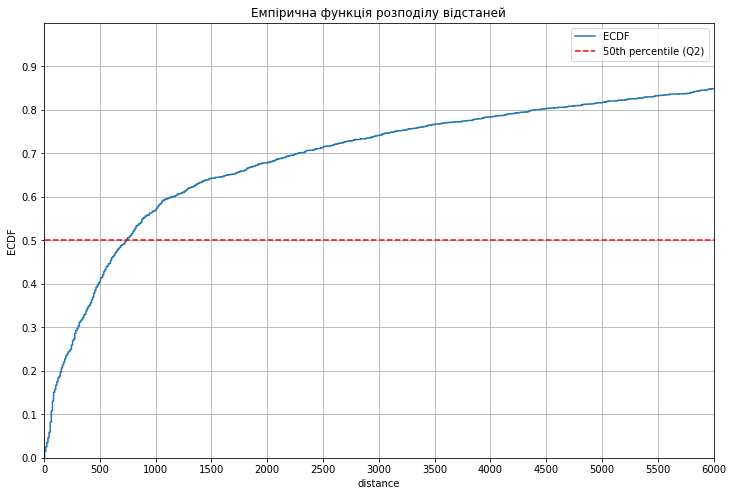

In [58]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = dist
ecdf = sm.distributions.ECDF(sample)

fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax.set_xticks(np.arange(0, 10000, 500))
ax.set_yticks(np.arange(0, 1., 0.1))

x = np.linspace(min(sample), 10000,num=1000)
y = ecdf(x)
plt.step(x, y, label='ECDF')
plt.plot(x,np.ones(len(x))*0.5,linestyle='--',color='r', label='50th percentile (Q2)')
# plt.plot(x,np.ones(len(x))*0.8,linestyle='--',color='r',)
plt.title('Емпірична функція розподілу відстаней')
plt.xlim(0, 6000)
plt.ylim(0, 1)
plt.legend()
plt.xlabel("distance")
plt.ylabel("ECDF");
plt.grid()
plt.show()

# Building features for future regression analysis
1) щільність
2) ентропія розташування, 
3) конкурентоспроможність, 
4) популярність, 
5) щільність переміщень, 
6) величина вхідного потоку, 
7) кількість зупинок, 
8) наявність поблизу важливих транспортних вузлів, 
9) кількість маршрутів, 
10) ентропія транспорту, 
11) щільність вулиць, 
12) щільність перехресть, 
13) середня заокругленість вулиць, 
14) центральність цільової точки, 
15) густину забудованості

In [12]:
from math import pi
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
ox.config(use_cache=True, log_console=True)

def get_OSMnx(x,y,rad):
    
    p = (x,y)
    
    G = ox.graph_from_point(p, distance=rad, network_type='walk')
    G_proj = ox.project_graph(G)
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    are = nodes_proj.unary_union.convex_hull.area

    try:
        gdf = ox.buildings_from_point(p, distance = rad)
        gdf_proj = ox.project_gdf(gdf)
        areas = gdf_proj.area
        building_density = sum(areas)/are
    except:
        building_density = np.nan
        
    
    # graph analysis
    stats = ox.basic_stats(G, area=500*500)
    temp = ox.extended_stats(G, ecc=True, bc=True, cc=True)
    for key, value in stats.items():
        temp[key] = value
    
    street_density = temp['street_density_km']#Total street length divided by area in square kilometers
    node_density = temp['intersection_density_km']#n divided by area in square kilometers
    circuity_avg = temp['circuity_avg'] #Total edge length divided by sum of great circle distances between the nodes incident to each edge Proportion of edges that have a single incident node (i.e., the edge links nodes u and v, and u = v)
    
#     # point analysys
    origin_node = ox.get_nearest_node(G, p)
    b_c = temp['betweenness_centrality'][origin_node]   #For each node, the fraction of all shortest paths that pass through the node
    
    return building_density, street_density, node_density, circuity_avg, b_c

In [13]:
from geopy.distance import vincenty
from geopy import distance
import requests

from math import log2
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook as tqdm

# Important transport nodes
r = requests.get('https://api.easyway.info/?login=trokhymovych.mykola&password=mw6GWvwhc29Kwmz&city=kyiv&function=cities.GetPlacesList')
important = r.json()['place']

transitions = transitions[transitions.distance>0]

my_cat = 'Restaurant' ##############################################

def get_transport_data(lat,lng):
    
    r = requests.get('https://api.easyway.info/?login=trokhymovych.mykola&password=mw6GWvwhc29Kwmz&city=kyiv&function=stops.GetStopsNearPointWithRoutes&lat='+str(lat)+'&lng='+str(lng)+'&r=200')
    data = r.json()
    
    # Number of stops
    number_of_stops = len(data['stop'])
    
    # preparation 
    temp = {}
    for t in ['bus','train','trol','tram','metro','boat']:
        temp[t] = set()
    for stop in data['stop']:
        for route in stop['routes']['route']: 
            type_ = route['@attributes']['type']
            number_ = route['title']
            temp[type_].add(number_)
    
    # Number of routes
    number_of_routes = 0
    for r in temp.keys():
        number_of_routes+=len(temp[r]) 

    #Transport Entropy
    entropy = 0
    for r in temp.keys():
        if len(temp[r])!=0:
            entropy+=(len(temp[r])/number_of_routes)*np.log2(len(temp[r])/number_of_routes)
    entropy = -entropy

    #Number of important transport nods
    important_nods = 0
    for el in important:
        p1 = (el['lat'], el['lng'])
        p2 = (lat,lng)
        if (vincenty(p1, p2).meters < 400):
            important_nods+=1 
    return number_of_stops, important_nods, number_of_routes, entropy 


# getting places around
def get_places_around(data, lat,lon):
    # circle area
    radius = 200
    center_coordinates = (lat,lon)
    places_ids = []
    for l,ll in zip(data.lat,data.lon):
        dist = distance.distance(center_coordinates, (l, ll)).m
        if dist <= 200:
            places_ids.append(list(data[data.lon==ll][data.lat==l].ven)[0])
    return data[data.ven.isin(places_ids)]

In [16]:
# mining_banks
from tqdm import tqdm_notebook as tqdm
import numpy as np

X_kiev = pd.read_csv('X_kiev.csv')


feature_names = ['density', 'place_entropy', 'competivness', 'popularity', 
                 'transitions_density','incoming_flow', 'number_of_stops', 'important_nods', 
                 'number_of_routes', 'transport_entropy', 'building_density', 
                 'street_density', 'node_density', 'circuity_avg', 'betweenness centrality']
density1 = []
place_entropy1 = []
competivness1 = []
popularity1 = []
t_density1 = []
incoming_flow1 = []
number_of_stops1 = []
important_nods1 = []
number_of_routes1 = []
transport_entropy1 = []
building_density1 = []
street_density1 = []
node_density1 = []
circuity_avg1 = []
b_c1 = []

for index, venue in tqdm(Y_kiev[Y_kiev.ven.isin(rest_id)].iterrows()): ###########################
    
    # getting dataframe of neibours
    temp = get_places_around(Y_kiev, venue['lat'], venue['lon'])

    # 1) density
    density = len(temp)
    density1.append(density)

    # 2) place entropy
    temp_cat = set(temp.cat)
    p_entropy = 0
    for c in temp_cat:
        dd = temp[temp.cat==c]
        p_entropy -= (len(dd) / density * log2(len(dd) / density))
    place_entropy1.append(p_entropy) 

    # 3) Competivness
    competivness = -len(temp[temp.cat==my_cat])/density
    competivness1.append(competivness)

    # 4) Popularity
    aa = X_kiev[X_kiev.ven.isin(temp.ven)]
    popularity = len(aa)
    popularity1.append(popularity)

    # 5) Transition Density
    f1 = transitions[transitions.A_id.isin(temp.ven)]
    f1 = f1[f1.B_id.isin(temp.ven)]
    t_density = len(f1)
    t_density1.append(t_density)

    # 6) Incoming Flow
    f1 = transitions[~transitions.A_id.isin(temp.ven)]
    f1 = f1[f1.B_id.isin(temp.ven)]
    incoming_flow = len(f1)
    incoming_flow1.append(incoming_flow)

    # 7,8,9,10
    number_of_stops, important_nods, number_of_routes, entropy = get_transport_data(venue['lat'], venue['lon'])
    number_of_stops1.append(number_of_stops)
    important_nods1.append(important_nods)
    number_of_routes1.append(number_of_routes)
    transport_entropy1.append(entropy)

    #11,12,13,14,15
    try:
        building_density, street_density, node_density, circuity_avg, b_c = get_OSMnx(venue['lat'], venue['lon'], 200)
        building_density1.append(building_density)
        street_density1.append(street_density)
        node_density1.append(node_density) 
        circuity_avg1.append(circuity_avg)
        b_c1.append(b_c)
    except:
        building_density1.append(np.nan)
        street_density1.append(np.nan)
        node_density1.append(np.nan) 
        circuity_avg1.append(np.nan)
        b_c1.append(np.nan)

In [17]:
data = pd.DataFrame({'density':density1, 
                     'place_entropy':place_entropy1,
                     'competivness':competivness1,
                     'popularity':popularity1,
                     'transitions_density':t_density1,
                     'incoming_flow':incoming_flow1,
                     'number_of_stops':number_of_stops1,
                     'important_nods':important_nods1,
                     'number_of_routes':number_of_routes1,
                     'transport_entropy':transport_entropy1,
                     'building_density':building_density1, 
                     'street_density':street_density1,
                     'node_density':node_density1,
                     'circuity_avg':circuity_avg1, 
                     'betweenness centrality':b_c1})

In [18]:
data.describe()

,density,place_entropy,competivness,popularity,transitions_density,incoming_flow,number_of_stops,important_nods,number_of_routes,transport_entropy,building_density,street_density,node_density,circuity_avg,betweenness centrality
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,0.0,249.000000,249.000000,249.000000,249.000000
mean,40.812000,3.819199,-0.145659,577.792000,45.036000,128.776000,2.920000,0.020000,8.548000,0.485967,NaN,15760.454153,273.365462,1.066753,0.153983
std,44.614645,1.576234,0.221350,973.219266,93.755314,214.646337,2.579188,0.140281,8.273906,0.497959,NaN,6934.532730,150.061059,0.057877,0.164537
min,1.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,NaN,289.616000,8.000000,0.999996,0.000000
25%,8.000000,2.807355,-0.160714,36.250000,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,NaN,10269.396000,148.000000,1.031632,0.023512
50%,24.500000,4.132944,-0.052632,187.000000,7.000000,42.500000,2.000000,0.000000,6.000000,0.522559,NaN,16542.136000,280.000000,1.052997,0.112646
75%,57.750000,5.089302,-0.032390,679.750000,47.750000,152.500000,4.000000,0.000000,14.000000,0.949452,NaN,20929.760000,372.000000,1.083692,0.226810
max,218.000000,6.248055,-0.006098,5467.000000,565.000000,1276.000000,18.000000,1.000000,43.000000,1.685475,NaN,31313.376000,676.000000,1.564280,1.000000


In [19]:
# adding venue id
data['ven'] = list(Y_kiev[Y_kiev.ven.isin(rest_id)].ven)

# adding venue checkins
data['Y'] = list(X_kiev[X_kiev.ven.isin(rest_id)].groupby('ven').count().user)


data = data.merge(Y_kiev, on='ven')
data = data[list(data.columns)[:19]]

data.to_csv('restorant_dataset.csv', index = False)

# Preprocesing is fineshed!!!!

In [1]:
import pandas as pd
X_kiev = pd.read_csv('X_kiev.csv')

In [2]:
data = pd.read_csv('coffee_dataset.csv')
feature_names = ['density', 'place_entropy', 'competivness', 'popularity', 
                 'transitions_density','incoming_flow', 'number_of_stops', 'important_nods', 
                 'number_of_routes', 'transport_entropy', #'building_density', 
                 'street_density', 'node_density', 'circuity_avg', 'betweenness centrality']

# Starting to build the model

In [3]:
import pandas as pd
Y_UA = pd.read_csv('venues_ua.csv')
Y_kiev = Y_UA[Y_UA.lat>50.31][Y_UA.lat<50.57][Y_UA.lon>30.24][Y_UA.lon<30.81]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
len(Y_kiev)

24743

In [5]:
# data = pd.read_csv('dataset_mined.csv')
# data = data[data.Y<155]

feature_names = ['density', 'place_entropy', 'competivness', 'popularity', 
                 'transitions_density','incoming_flow', 'number_of_stops', 'important_nods', 
                 'number_of_routes', 'transport_entropy', #'building_density', 
                 'street_density', 'node_density', 'circuity_avg', 'betweenness centrality']

X = data
# X.drop('building_density', axis=1, inplace=True)
# X = X.merge(Y_kiev, on='ven')
# X.to_csv('train.csv', index=False)

X.fillna(X.mean(), inplace=True)

y = data.Y

other = list(X.columns)
for i in feature_names:
    other.remove(i)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
# restic # 42
# bank #1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1./9., random_state=2)

X_train.merge(Y_kiev, on='ven').to_csv('train.csv', index=False)
X_val.merge(Y_kiev, on='ven').to_csv('validation.csv', index=False)
X_test.merge(Y_kiev, on='ven').to_csv('test.csv', index=False)

In [7]:
# Checking sizes:
print('Should be 200')
print(len(X_train))
print('Should be 25')
print(len(X_val))
print('Should be 25')
print(len(X_test))

Should be 200
203
Should be 25
26
Should be 25
26


# Defining preprocessing methods

In [8]:
def standartize(df):
    df2 = df[other]
    df = df[feature_names]
    df = (df-df.mean())/df.std()
    return pd.concat([df,df2], axis=1)

def normalize(df): 
    df2 = df[other]
    df = df[feature_names]
    df = (df-df.min())/(df.max()-df.min())
    return pd.concat([df,df2], axis=1)

def mixpreprocessing(df):
    df2 = df[other]
    df =  1./(1+np.exp(-standartize(df)[feature_names]))
    return pd.concat([df,df2], axis=1)

# Defining metrics

In [9]:
def precision_at_k(true, predict, k=10):
    tt = pd.DataFrame({'id':np.arange(len(predict)), 'true':true, 'pred':predict})
    true = tt.sort_values(by='true', ascending=False).id.values[:k]
    predict = tt.sort_values(by='pred', ascending=False).id.values[:k]
    return len(set(true).intersection(set(predict)))/float(k)

def AP(true, predict, k=10):
    
    tt = pd.DataFrame({'id':np.arange(len(predict)), 'true':true, 'pred':predict})
    true = tt.sort_values(by='true', ascending=False).id.values[:k]
    predict = tt.sort_values(by='pred', ascending=False).id.values[:k]
    precisions = np.zeros(k)
    tru_predicted = 0.
    
    for i in range(k):
        if predict[i] in true:
            tru_predicted += 1
            precisions[i] = tru_predicted/(i+1)
    return sum(precisions)/k

def NDCG_implicit(true, predict, k=10):
    
    tt = pd.DataFrame({'id':np.arange(len(predict)), 'true':true, 'pred':predict})
    true = tt.sort_values(by='true', ascending=False).id.values[:k]
    predict = tt.sort_values(by='pred', ascending=False).id.values[:k]
    
    idcg = 0.
    for i in range(k):
        idcg += 1./np.log2(i+2)

    dcg = 0.
    for i in range(k):
        if predict[i] in true:
            dcg += 1./np.log2(i+2)
    return dcg/idcg

# Defining models with full grid search on train/test split

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

## Baseline model

In [11]:
from copy import deepcopy
def baseline(x):
    pred = deepcopy(x)
    np.random.seed(10)
    np.random.shuffle(pred)
    return pred
base_res1 = NDCG_implicit(list(y_val), baseline(list(y_val)), k=10)
base_res2 = AP(list(y_val), baseline(list(y_val)), k=10)
base_res3 = precision_at_k(list(y_val), baseline(list(y_val)), k=10)

print(base_res1,base_res2,base_res3)


0.23758350840568812 0.09107142857142857 0.3


In [12]:
from copy import deepcopy

base_res_2 = AP(list(y_test), baseline(list(y_test)), k=10)
base_res_2

0.08607142857142858

In [13]:
def train_algo(model, grid, metric):
    
    if model in set([Ridge, Lasso, SGDRegressor, ElasticNet]):
        X_train2 = mixpreprocessing(X_train)
        X_val2 = mixpreprocessing(X_val)
        X_test2 = mixpreprocessing(X_test)
    
    # finding the best model and parameters
    params_matrix = [grid[k] for k in grid.keys()]
    params_combinations = list(itertools.product(*params_matrix))
    all_combinations = []
    for pc in params_combinations:
        params = {}
        for k, i in zip(grid.keys(), range(0, len(pc))):
            params[k] = pc[i]
        all_combinations.append(params)
    
    
    best_res = 0
    best_params = all_combinations[0]
    res=0
    best_model=0
    temp = []
    error = 0
    for c in tqdm(all_combinations):
        try:
            model = model.set_params(**c)
            model.fit(X_train[feature_names], y_train)
            predict = model.predict(X_val[feature_names])
            met = metric(list(y_val), predict, k=10)
            temp.append(met)
            # conditions
            if(met>best_res):
                best_res = met
                best_params = c
                best_model = model
                ap1= AP(list(y_val), predict, k=10)
                precision_at_k1= precision_at_k(list(y_val), predict, k=10)
        except:
            error+=1
    print('Number of errors occured '+str(error))
            
    # testing results on testset
    predict = best_model.predict(X_test[feature_names])
    best_res_test = metric(y_test, predict, k=10)
    print('result on validation is '+str(best_res))
    print('result on test is '+str(best_res_test))
    diff = round(abs(best_res-best_res_test)/best_res*100,2)
    print('difference is '+str(round(diff))+'%')
    
    ap2= AP(list(y_test), predict, k=10)
    precision_at_k2= precision_at_k(list(y_test), predict, k=10)
            
            
    
    
    return best_res,best_res_test, ap1,ap2,precision_at_k1,precision_at_k2, best_params, best_model, diff

In [14]:
import itertools
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

dtr_grid = {
                      'max_depth': [x for x in range(1,8)],
                      'min_samples_split': [x for x in range(2,10)],
                      'min_samples_leaf': [x for x in range(1,10)]
                     }
rfr_grid = {
                      'max_depth': [x for x in range(1,8)],
                      'min_samples_split': [x for x in range(2,10)],
                      'min_samples_leaf': [x for x in range(1,10)],
                        'random_state': [2]
                     }
lir_grid = {
                      'penalty': ['none'],
                      'max_iter': [x*100 for x in range(10,100,10)],
                      'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
                     }
rr_grid = {
                      'alpha': [x*0.1 for x in range(5,15)],
                      'max_iter': [x*100 for x in range(10,100,10)],
                      'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag', 'saga']
                     }
lar_grid = {
                      'alpha': [x*0.1 for x in range(5,15)],
                      'max_iter': [x*100 for x in range(10,100,10)]
                     }
enr_grid = {
                      'alpha': [x*0.1 for x in range(5,15)],
                      'max_iter': [x*100 for x in range(10,100,10)],
                      'l1_ratio' : [x*0.1 for x in range(1,9)]
                     }
xgb_grid = {
                      'max_depth': [x for x in range(2,4)],
                      'learning_rate': [x*0.001 for x in range(0,100,7)],
                      'n_estimators': [x*10 for x in range(5,15,2)],
                      'reg_alpha': [x*0.05 for x in range(3,15,4)],
                      'reg_lambda': [x*0.05 for x in range(3,14,4)],
                         'random_state': [2]
                     }

grids = [dtr_grid, rfr_grid , lir_grid, rr_grid, lar_grid, enr_grid, xgb_grid]
models = [DecisionTreeRegressor(), RandomForestRegressor(), SGDRegressor(), Ridge(), Lasso(), ElasticNet(), XGBRegressor()]
names = ['Baseline', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SGDRegressor', 
         'Ridge', 'Lasso', 'ElasticNet', 'XGBRegressor']

best_res,best_res2,best_res3,best_res_test,best_res_test2,best_res_test3, best_params, best_model, diff = [base_res1],[base_res2],[base_res3],[base_res1],[base_res2],[base_res3],[],[],[0]
for m,g in zip(models, grids):
    i1,i2,i12, i22,i13,i23, i3, i4, i6 = train_algo(m, g, NDCG_implicit)
    best_res.append(i1)
    best_res_test.append(i2)
    best_res2.append(i12)
    best_res_test2.append(i22)
    best_res3.append(i13)
    best_res_test3.append(i23)
    best_params.append(i3)
    best_model.append(i4)
    diff.append(i6)



Number of errors occured 0
result on validation is 0.696162268139923
result on test is 0.6719377023185354
difference is 3.0%



Number of errors occured 0
result on validation is 0.78180487222265
result on test is 0.6528642754944294
difference is 16.0%



Number of errors occured 0
result on validation is 0.49435723575344825
result on test is 0.6059848036189867
difference is 23.0%



Number of errors occured 0
result on validation is 0.5965377185773229
result on test is 0.4985723557253838
difference is 16.0%



Number of errors occured 0
result on validation is 0.5933607200949346
result on test is 0.5704044892860389
difference is 4.0%



Number of errors occured 0
result on validation is 0.5199967979955745
result on test is 0.5653701424067237
difference is 9.0%



Number of errors occured 0
result on validation is 0.6840182226156365
result on test is 0.677273373952691
difference is 1.0%


In [312]:
names = ['Baseline', 'DecisionTree', 'RandomForest', 'SGD', 
         'Ridge', 'Lasso', 'ElasticNet', 'XGBRegressor']

result_df = pd.DataFrame({'Algorithm': names, 'NDCG_val': best_res, 'NDCG_test': best_res_test,'AP_val': best_res2, 'AP_test': best_res_test2,'Precision_val': best_res3, 'Precision_test': best_res_test3,'diff_in_%':diff})    
result_df

,Algorithm,NDCG_val,NDCG_test,AP_val,AP_test,Precision_val,Precision_test,diff_in_%
0,Baseline,0.237584,0.237584,0.091071,0.091071,0.3,0.3,0.00
1,DecisionTree,0.696162,0.671938,0.523333,0.477500,0.6,0.6,3.48
2,RandomForest,0.781805,0.652864,0.646825,0.468095,0.7,0.6,16.49
3,SGD,0.494357,0.605985,0.291667,0.407143,0.4,0.5,22.58
4,Ridge,0.596538,0.498572,0.394643,0.287302,0.5,0.4,16.42
5,Lasso,0.593361,0.570404,0.387698,0.350000,0.5,0.5,3.87
6,ElasticNet,0.519997,0.565370,0.319444,0.342857,0.4,0.5,8.73
7,XGBRegressor,0.684018,0.677273,0.495556,0.482222,0.6,0.6,0.99


In [314]:
# trace = go.Bar(
#             x=show_df['name'].values,
#             y=show_df[colum_name].values,
#             marker=dict(
#                color=colors[i]),
#         )

#         data = [trace]
#         layout = go.Layout(
#             title='Comparing '+colum_name+' in datasets',
#             xaxis={'title':''},
#             yaxis={'title':colum_name}
#         )

#         fig = go.Figure(data=data, layout=layout)
#         config={'showLink': False, 'displayModeBar': False}
#         py.plot(fig, filename=plot_path + colum_name +'.html', config=config, auto_open=False)



import plotly.plotly as py
import plotly.figure_factory as ff

import pandas as pd

df = result_df.round(2)
df = df.set_index('Algorithm')

colorscale = [[0, '#0b111b'],[.5, '#c1e1ee'],[1, '#93b2bf']]

table = ff.create_table(df, colorscale=colorscale, index=True, )
# Make text size larger
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 14
config={'showLink': False, 'displayModeBar': False}
    
plot(table, filename='coffee_table' + '.html', config=config, auto_open=False)
py.iplot(table)

In [316]:
df = result_df.round(2)
x = list(df.Algorithm)
traces = []
all_colors_mean = ['#c1e1ee', '#93b2bf']

traces.append(go.Scatter(x=x, y=df.ix[:, 'NDCG_val'],
                             name='trend for metric', line=dict(color=('rgb(22, 96, 167)'), width=4, dash='dot')))

for name, color in zip(list(df.columns)[1:3], all_colors_mean):
        y=df[name].values
        traces.append(go.Bar(x=x, y=y,
                             text=y, textfont=dict(size=15),
                             name=name,
                             marker=dict(color=color, line=dict(color='rgb(8,48,107)', width=1.5), ),
                             opacity=0.6))


layout = go.Layout(height=450, width=650,
                       font=dict(color='white'),
                       title='NDCG metrics on train/test/val split',
                       titlefont=dict(size=20, color='white'),
                       xaxis=dict(tickfont=dict(size=10, color='white')),
                       yaxis=dict(tickfont=dict(color='white'), range=[0.2, 0.8]),
                      paper_bgcolor='#121f2a',
                      plot_bgcolor='#121f2a')
fig = go.Figure(traces, layout=layout)
plot(fig, filename='plot_coffee_1' + '.html', config=config, auto_open=False)
py.iplot(fig)

## Cross validation

In [319]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def train_algo_cv(model, grid, metric):
    
    scorer = make_scorer(metric)
    
    random_grid_XGB_CV = RandomizedSearchCV(model,
                                            grid,
                                            scoring = scorer,
                                            cv = CV_SSS,
                                            n_iter = 200
                                            )

    random_grid_XGB_CV.fit(X_train[feature_names], y_train)
    
    best_res = random_grid_XGB_CV.best_score_
    
    best_model = random_grid_XGB_CV.best_estimator_
    
    predict = best_model.predict(X_val[feature_names])
    best_res2, best_res3  = AP(y_val, predict), precision_at_k(y_val, predict)
    
    
    
    # testing results on testset
    predict = best_model.predict(X_test[feature_names])
    best_res_test = metric(y_test, predict)
    best_res_test2, best_res_test3  = AP(y_test, predict), precision_at_k(y_test, predict)
    print('result on validation is '+str(best_res))
    print('result on test is '+str(best_res_test))
    diff = round(abs(best_res-best_res_test)/best_res*100,2)
    print('difference is '+str(round(diff))+'%')
            
            
    
    
    return best_res, best_res_test, best_res2, best_res_test2, best_res3, best_res_test3, best_model, diff

data = pd.read_csv('coffee_dataset.csv')
X = data
# X = X.merge(Y_kiev, on='ven')
X.fillna(X.mean(), inplace=True)
y = data.Y
# X = mixpreprocessing(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1./9., random_state=42)

CV_SSS = ShuffleSplit(n_splits=8, test_size=1./9., random_state=13)

grids = [dtr_grid, rfr_grid , lir_grid, rr_grid, lar_grid, enr_grid, xgb_grid]
models = [DecisionTreeRegressor(), RandomForestRegressor(), SGDRegressor(), Ridge(), Lasso(), ElasticNet(), XGBRegressor()]
names = ['Baseline', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SGDRegressor', 
         'Ridge', 'Lasso', 'ElasticNet', 'XGBRegressor']

best_res, best_res_test, best_model, diff = [base_res],[base_res],[],[0]
best_res,best_res2,best_res3,best_res_test,best_res_test2,best_res_test3, best_model, diff = [base_res1],[base_res2],[base_res3],[base_res1],[base_res2],[base_res3],[],[0]

for m,g in zip(models, grids):    
    i1,i2,i12, i22,i13,i23, i3, i6 = train_algo_cv(m, g, NDCG_implicit)
    best_res.append(i1)
    best_res_test.append(i2)
    best_res2.append(i12)
    best_res_test2.append(i22)
    best_res3.append(i13)
    best_res_test3.append(i23)
    best_params.append(i3)
    diff.append(i6)
    
result_df_cv = pd.DataFrame({'algorithm': names, 'result_on_validation': best_res, 'result_on_test': best_res_test,'difference_in_%':diff})    



result on validation is 0.5569219467913317
result on test is 0.4163824138054737
difference is 25.0%
result on validation is 0.5545240796705359
result on test is 0.5455017237786198
difference is 2.0%
result on validation is 0.4958990177580284
result on test is 0.46299204139243627
difference is 7.0%
result on validation is 0.5260751726659298
result on test is 0.20904936749052638
difference is 60.0%
result on validation is 0.5640607554472286
result on test is 0.2992268320114626
difference is 47.0%
result on validation is 0.5504800950567618
result on test is 0.3845937724137609
difference is 30.0%
result on validation is 0.5746863798059912
result on test is 0.5618918191694954
difference is 2.0%


In [320]:
names = ['Baseline', 'DecisionTree', 'RandomForest', 'SGD', 
         'Ridge', 'Lasso', 'ElasticNet', 'XGBRegressor']

result_df_cv = pd.DataFrame({'Algorithm': names, 'NDCG_val': best_res, 'NDCG_test': best_res_test,'AP_val': best_res2, 'AP_test': best_res_test2,'Precision_val': best_res3, 'Precision_test': best_res_test3,'diff_in_%':diff})    
result_df_cv

,Algorithm,NDCG_val,NDCG_test,AP_val,AP_test,Precision_val,Precision_test,diff_in_%
0,Baseline,0.237584,0.237584,0.091071,0.091071,0.3,0.3,0.00
1,DecisionTree,0.556922,0.416382,0.523333,0.242976,0.6,0.5,25.24
2,RandomForest,0.554524,0.545502,0.423889,0.365833,0.6,0.6,1.63
3,SGD,0.495899,0.462992,0.113333,0.272222,0.3,0.5,6.64
4,Ridge,0.526075,0.209049,0.370833,0.072619,0.5,0.3,60.26
5,Lasso,0.564061,0.299227,0.375000,0.135278,0.5,0.4,46.95
6,ElasticNet,0.550480,0.384594,0.281667,0.198611,0.4,0.4,30.13
7,XGBRegressor,0.574686,0.561892,0.281667,0.394167,0.4,0.6,2.23


In [321]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff


init_notebook_mode(connected=True)
df = result_df_cv.round(2)
x = list(df.Algorithm)
traces = []
all_colors_mean = ['#c1e1ee', '#93b2bf']

traces.append(go.Scatter(x=x, y=df.ix[:, 'NDCG_val'],
                             name='trend for metric', line=dict(color=('rgb(22, 96, 167)'), width=4, dash='dot')))

for name, color in zip(list(df.columns)[1:3], all_colors_mean):
        y=df[name].values
        traces.append(go.Bar(x=x, y=y,
                             text=y, textfont=dict(size=15),
                             name=name,
                             marker=dict(color=color, line=dict(color='rgb(8,48,107)', width=1.5), ),
                             opacity=0.6))


layout = go.Layout(height=450, width=650,
                       font=dict(color='white'),
                       title='NDCG metrics on cross-validation',
                       titlefont=dict(size=20, color='white'),
                       xaxis=dict(tickfont=dict(size=10, color='white')),
                       yaxis=dict(tickfont=dict(color='white'), range=[0.3, 0.85]),
                      paper_bgcolor='#121f2a',
                      plot_bgcolor='#121f2a')
fig = go.Figure(traces, layout=layout)
plot(fig, filename='plot_coffee_2' + '.html', config=config, auto_open=False)
# py.iplot(fig)

'file:///Users/trokhymovych/Documents/GEOProject/dataset_WWW2019/plot_coffee_2.html'

## Features importance 

In [326]:
best_model = best_params[-6]
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [327]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

x = feature_names
traces = []
all_colors_mean = ['#c1e1ee', '#93b2bf']

# for name, color in zip(list(df.columns)[1:3], all_colors_mean):
y= best_model.feature_importances_
traces.append(go.Bar(x=x, y=y,
                     text=y, textfont=dict(size=15),
                     name=name,
                     marker=dict(color='#c1e1ee', line=dict(color='rgb(8,48,107)', width=1.5), ),
                     opacity=0.6))


layout = go.Layout(height=450, width=650,
                       font=dict(color='white'),
                       title='Features importance',
                       titlefont=dict(size=20, color='white'),
                       xaxis=dict(tickfont=dict(size=10, color='white')),
                       yaxis=dict(tickfont=dict(color='white'), range=[0, 0.25]),
                      paper_bgcolor='#121f2a',
                      plot_bgcolor='#121f2a')
fig = go.Figure(traces, layout=layout)
plot(fig, filename='plot_coffee_3' + '.html', config=config, auto_open=False, )
py.iplot(fig)

In [41]:
A = np.array([[1.0, 0.5, 0.5, 0.5], 
     [1.5, 1.0, 0.5, 0.5], 
     [1.5, 1.5, 1.0, 1.0], 
     [1.5, 1.5, 1.0, 1.0]])
b = np.array([2.5, 3.5, 5, 5])

b1 = A.dot(b)
K1 = b1/np.sum(b1)
K1

array([0.15546218, 0.20588235, 0.31932773, 0.31932773])

In [42]:
b2 = A.dot(b1)
display(b2)
K2 = b2/np.sum(b2)
K2

array([34.375, 45.125, 70.25 , 70.25 ])

array([0.15625   , 0.20511364, 0.31931818, 0.31931818])

In [43]:
np.sum(b1)

59.5

In [44]:
np.sum(b2)

220.0